## Boston House Prediction with Regularization

In [1]:
## import package
import sklearn #scikit-learn
import statsmodels
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
## import dataset
from sklearn.datasets import load_boston

# MULTIPLE LINEAR REGRESSION

In [3]:
## save to dictionary
boston=load_boston() # Dictionary

In [4]:
## define keys (columns) of dictionary
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [5]:
## description of column DESCR
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [6]:
## determine shape of dataset
boston['data'].shape

(506, 13)

In [7]:
## define values in column 'target'
boston['target']

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [8]:
## define values in column 'feature_names'
boston['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [9]:
## convert to DataFrame
df=pd.DataFrame(data=boston['data'],columns=boston['feature_names'])
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [10]:
## keep 'target' column as Series
target=pd.Series(boston['target'])
target

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Length: 506, dtype: float64

In [11]:
## import Series 'target' to DataFrame as column 'Price'
df['Price']=target
df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


<hr>

## QUICK EDA

In [12]:
## check type of data in every columns
df.dtypes
## Result: all of them are numeric columns in float data type

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
Price      float64
dtype: object

In [13]:
## check for missing value
df.info()
## Result: no missing value detected

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [14]:
## describe every columns
df.describe()
## Result: no indication of preliminary anomaly detected

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [15]:
## summarize description of columns
bsDesc=[]
for i in df.columns:
    bsDesc.append([
        i,
        df[i].dtypes,
        df[i].isna().sum(),
        round((df[i].isna().sum()/len(df))*100,2),
        df[i].nunique(),
        df[i].drop_duplicates().sample(2).values
    ])

In [16]:
## present as DataFrame
pd.DataFrame(data=bsDesc,columns=['Features','DataType','Null','Null(%)','Unique','UniqueSample'])
## Result: no missing value indicated, all numerics value in float data type, there are 14 columns

,Features,DataType,Null,Null(%),Unique,UniqueSample
0,CRIM,float64,0,0.0,504,"[19.6091, 0.04417]"
1,ZN,float64,0,0.0,26,"[20.0, 52.5]"
2,INDUS,float64,0,0.0,76,"[10.81, 3.24]"
3,CHAS,float64,0,0.0,2,"[0.0, 1.0]"
4,NOX,float64,0,0.0,81,"[0.453, 0.504]"
5,RM,float64,0,0.0,446,"[5.905, 6.485]"
6,AGE,float64,0,0.0,356,"[82.8, 23.3]"
7,DIS,float64,0,0.0,412,"[1.4394, 4.9671]"
8,RAD,float64,0,0.0,9,"[8.0, 24.0]"
9,TAX,float64,0,0.0,66,"[241.0, 270.0]"


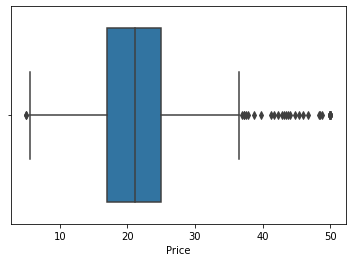

In [17]:
## check for outlier in 'Price' (target variable) with Boxplot
sns.boxplot(df['Price'])
plt.show()
## Result: there are outliers detected

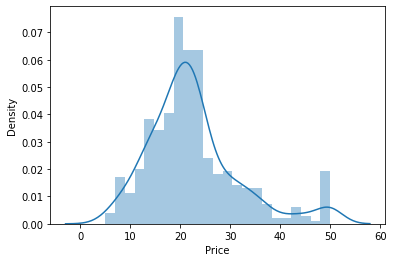

In [18]:
## check for data distribution of 'Price' (target variable) with histogram
sns.distplot(df['Price'])
plt.show()
## Result: target is not normally distributed

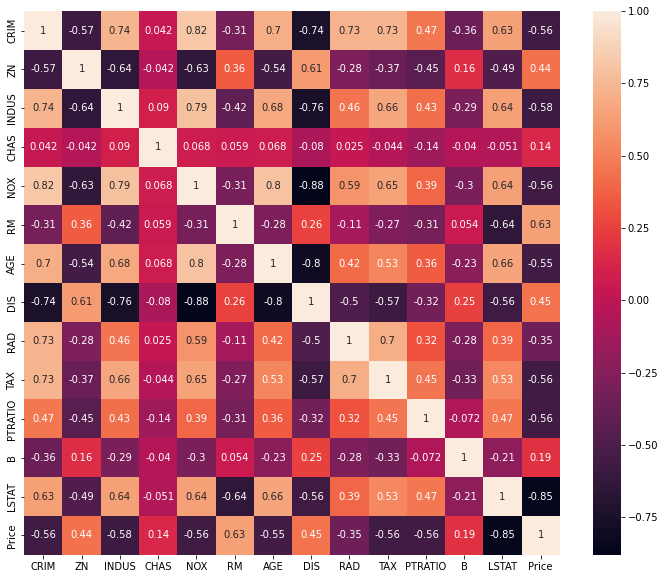

In [19]:
## CORRELATION TEST with Spearman (because outliers detected)
plt.figure(figsize=(12,10))
sns.heatmap(df.corr('spearman'),annot=True)
plt.show()
## We only focused on correlation of variables to 'Price' (target variable)
## Result: We detected most of the features have correlation within range of 0.5 - 0.65 towards Price. The only higher value is LSTAT.

<hr>

## FEATURE SELECTIONS

- Choose Features to be used for Training Model
- One of the method is using correlation test result (as above)
- Drop columns with Correlation Test result within -0.5 < x < 0.5 towards Price (ZN, CHAS, DIS, RAD, B)

In [20]:
df.drop(columns=['ZN','CHAS','DIS','RAD','B'],inplace=True)
df

,CRIM,INDUS,NOX,RM,AGE,TAX,PTRATIO,LSTAT,Price
0,0.00632,2.31,0.538,6.575,65.2,296.0,15.3,4.98,24.0
1,0.02731,7.07,0.469,6.421,78.9,242.0,17.8,9.14,21.6
2,0.02729,7.07,0.469,7.185,61.1,242.0,17.8,4.03,34.7
3,0.03237,2.18,0.458,6.998,45.8,222.0,18.7,2.94,33.4
4,0.06905,2.18,0.458,7.147,54.2,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...
501,0.06263,11.93,0.573,6.593,69.1,273.0,21.0,9.67,22.4
502,0.04527,11.93,0.573,6.120,76.7,273.0,21.0,9.08,20.6
503,0.06076,11.93,0.573,6.976,91.0,273.0,21.0,5.64,23.9
504,0.10959,11.93,0.573,6.794,89.3,273.0,21.0,6.48,22.0


<hr>

## MACHINE LEARNING
- Purpose: to predict (answer) from new data (problems)
- New Data: data not in dataset, never been learned by the (study) Model, never been seen and pattern never been known

### - MODEL
- (Study) Training Model -> model that studied pattern in the data
- Training Model Process -> **.fit(X,y)** -> *.fit(Question(s),Answer)*
    - Question(s) -> Features -> X -> Independent Variable(s)
    - Answer(s) -> Target -> y -> Dependent Variable

### - EVALUATION MATRIX
- To score how well does our model could predict the 'Answer' -> by comparing 'Modelled Answer' with 'Answer Key'
    - Answer Key -> actual data (target)
    - Modelled Answer -> prediction from Model

### - SPLITTING DATA
- Dataset splitted into 2 purposes:
    1. Data for Training (Study)
        - Data used by Model to study the pattern -> Model already know the features and target because it has been the data before
    2. Data for Testing -> for simulation of new data
        - Never been seen by Model, will be studied by Model and to be predicted as new data simulation

- For instance:
    - We had dataset (100%), splitted into 
        1. Training Data (80%) to be studied by Model -> Model study the Pattern between Features (X) and Target (y) -> ex: Try Out Practice 
        2. The rest (20%) to be used as prediction and to formulate Evaluation Matrix -> ex: Real Test

- In the ideal case, train and test data distribution ranged from 70%-85% for Train means the rest 15%-30% for Test Data.

### - GOALS
Goals for **Supervised** Machine Learning generally to produce the greatest *score* of Evaluation Matrix as possible.
 - Underfitting -> both score for Evaluation Matrix using training data or testing data are **bad** (will be elaborate later on what is a bad Evaluation Matrix score)
 - Overfitting -> Evaluation Matrix score for training data is good, but when Model implemented to testing data, the score is **bad** (significant discrepancies of Evaluation Matrix score for both data about ~>5%)
 - Fit (ideal) -> Difference between Evaluation Matrix score for training data and testing data is insignificant

 ### EXAMPLE
 1. Model A:
    - Evaluation Matrix Train: 93
    - Evaluation Matrix Test: 83
    
2. Model B:
    - Evaluation Matrix Train: 84
    - Evaluation Matrix Test: 81

- Decision: 
    - Choose Model B because more stable and difference is below <5
    - Model A is overfitting
    - Actually, even though model B produce stable outcome and fit, in the real case, management/client may request for minimum score for each evaluation matrix (90 or above). Therefore, fit Model does not always translate into "good Model" because there is a possibility of a fit Model may not suffice user's requirement.

<hr>

## SPLITTING DATASET

In [21]:
## Assign independent variable/feature to X and dependent variable/target to y
X=df.drop(columns='Price')
y=df['Price']

In [22]:
## import package
from sklearn.model_selection import train_test_split

In [23]:
## split into training set and testing set with proportion of 85%:15%
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.15,random_state=8) 
# test_size = data proportion -> fill with data row or % -> example for data row 500 -> choose 500 data randomly for training, the rest for test

In [24]:
## Question for Mock-Up Test
X_train.head()

,CRIM,INDUS,NOX,RM,AGE,TAX,PTRATIO,LSTAT
298,0.06466,2.24,0.400,6.345,20.1,358.0,14.8,4.97
68,0.13554,6.07,0.409,5.594,36.8,345.0,18.9,13.09
496,0.28960,9.69,0.585,5.390,72.9,391.0,19.2,21.14
153,2.14918,19.58,0.871,5.709,98.5,403.0,14.7,15.79
33,1.15172,8.14,0.538,5.701,95.0,307.0,21.0,18.35


In [25]:
## Question for Real Test
X_test.head()

,CRIM,INDUS,NOX,RM,AGE,TAX,PTRATIO,LSTAT
337,0.03041,5.19,0.515,5.895,59.6,224.0,20.2,10.56
30,1.13081,8.14,0.538,5.713,94.1,307.0,21.0,22.60
364,3.47428,18.10,0.718,8.780,82.9,666.0,20.2,5.29
240,0.11329,4.93,0.428,6.897,54.3,300.0,16.6,11.38
162,1.83377,19.58,0.605,7.802,98.2,403.0,14.7,1.92


In [26]:
## Answer Key for Mock-Up Test
y_train.head()

298    22.5
68     17.4
496    19.7
153    19.4
33     13.1
Name: Price, dtype: float64

In [27]:
## Answer Key for Real Test
y_test.head()

337    18.5
30     12.7
364    21.9
240    22.0
162    50.0
Name: Price, dtype: float64

In [28]:
## Shape of Mock-Up Test Question
X_train.shape

(430, 8)

In [29]:
## Shape of Real Test Question
X_test.shape

(76, 8)

<hr>

## Machine Learning Modelling

In [30]:
## import package
from sklearn.linear_model import LinearRegression

In [31]:
## Build Model with Linear Regression
Model = LinearRegression(fit_intercept=True)
# fit_intercept=False means constanta value (b) = 0, so target will has value of 0 when all features have value 0
## usage of fit_intercept depends on business condition/cases and independent variable (y)
### we assume all features will not have 0 value even though house price is 0

In [32]:
# Learning Mode -> finding pattern from question-answer of Training Data
Model.fit(X_train,y_train)

LinearRegression()

In [33]:
## QUICK EVALUATION MATRIX - Training Data
Model.score(X_train,y_train)
# Check Evaluation Matrix score of Training Data

0.6931397182159605

In [34]:
## QUICK EVALUATION MATRIX - Test Data
Model.score(X_test,y_test)
# Check Evaluation Matrix score of Test Data

0.6362367832355484

In [35]:
## Set Model to predict Answer for Mock Up Test
Model.predict(X_train)

array([30.28293062, 18.72273928, 12.9477843 , 21.47917065, 14.95890191,
        3.58200036, 14.19124961, 23.35025631, 19.35500691, 31.04458353,
       16.49716494, 12.75154295, 27.07355077, 31.59739533, 21.83292028,
       22.70332871, 30.11961514, 32.50703653, 18.22839889, 30.63150702,
       21.94467111, 24.57289026, 22.77783979, 15.67085757,  0.7667683 ,
       28.41303216,  0.39830966, 38.89920947, 33.96509303, 26.66478313,
       20.63939197, 23.92672508, 27.59687608, 29.713177  , 16.29998859,
       19.83225735, 39.87581772, 10.39622747, 21.31016924, 20.00803487,
       38.23805478, 14.14122618, 24.36427216, 21.73500701, 28.20216403,
       28.28743397, 17.81294284, 25.41208932, 24.49722379, 16.63403918,
       24.87017934, 29.2373735 , 37.84800486,  7.04791954, 24.64694627,
       39.64239435, 28.86363763, 29.79917199, 19.48423179, 11.49630654,
       18.52754611,  9.62698857, 24.53889975, 19.14013188, 27.96006475,
       32.61343669, 27.08760364, 30.13315595, 35.66269411, 23.10

In [36]:
## Set Model to predict Answer for Real Test Question
Model.predict(X_test)

array([20.50582545, 12.46725002, 36.23112133, 28.06065089, 40.18702295,
       24.63261533, 13.44020281, 30.68392827, 28.55866471, 30.23617052,
       15.39892254,  4.40332104, 15.55684093, 23.70221877, 18.53306088,
       29.59212573, 23.15857419, 21.94629854, 21.65208669,  6.63232485,
       22.28604537, 27.91953014, 31.36359548, 33.48971972, 30.45134373,
       31.80900657,  2.61308954, 17.01283145, 27.70003152, 23.7412566 ,
       33.44428837, 18.15037051, 19.07476999, 22.41192249, 27.22943475,
       26.13185735, 33.30549739, 25.9615366 , 14.55873061, 11.98492314,
       19.32117528, 24.14387396, 34.96348631, 33.59926292, 29.18611367,
       21.67489955, 17.23428769, 19.47662042, 23.745383  , 22.62602001,
       21.22623411, 14.77604841, 31.52809258, 15.02452071, 20.59125377,
       26.17424237, 20.23661409,  1.53793722, 19.60419261, 29.01321651,
       27.1525987 , 20.10417387, 22.22661286, 11.35604616, 17.39468283,
       21.24462801, 10.13908929, 19.87767821, 33.99280817, 36.62

In [37]:
## Constanta value 
Model.intercept_
# Single Linear Regression: Y=ax+b -> b value
# Multiple Linear Regression: Y=ax+bx2+cx3+dx5+......+Z -> Z value

20.115832202121155

In [38]:
## Coefficient value
Model.coef_
# Single Linear Regression: Y=ax+b -> a value
# Multiple Linear Regression: Y=ax+bx2+cx3+dx5+......+Z -> a,b,c,d value

array([-5.45727030e-02,  3.68513224e-02, -4.05892636e+00,  4.47903517e+00,
        2.29732166e-02, -7.41893715e-04, -9.42582049e-01, -5.94321302e-01])

In [39]:
## Define features for training set
X_train.columns

Index(['CRIM', 'INDUS', 'NOX', 'RM', 'AGE', 'TAX', 'PTRATIO', 'LSTAT'], dtype='object')

In [40]:
## Present coefficient of every features in tabular
pd.DataFrame(data=Model.coef_,index=X_train.columns,columns=['Coef'])

,Coef
CRIM,-0.054573
INDUS,0.036851
NOX,-4.058926
RM,4.479035
AGE,0.022973
TAX,-0.000742
PTRATIO,-0.942582
LSTAT,-0.594321


## Multiple Regression
### Y=ax+bx2+cx3+dx5+......+Z
- a,b,c,d = coefficient
- x,x2,x3,x4 = independent variables
- Z = constanta 

#### Predicted Price
> **Y = Z - aCRIM + bINDUS - cNOX + dRM + eAGE - fTAX - gPTRATIO - hLSTAT**

In [41]:
## Question for Mock Up Test
X_train.head()

,CRIM,INDUS,NOX,RM,AGE,TAX,PTRATIO,LSTAT
298,0.06466,2.24,0.400,6.345,20.1,358.0,14.8,4.97
68,0.13554,6.07,0.409,5.594,36.8,345.0,18.9,13.09
496,0.28960,9.69,0.585,5.390,72.9,391.0,19.2,21.14
153,2.14918,19.58,0.871,5.709,98.5,403.0,14.7,15.79
33,1.15172,8.14,0.538,5.701,95.0,307.0,21.0,18.35


In [42]:
## Predict Entirely New Data - Not in Dataset (Random)
Model.predict([[0.02,21.56,0.75,7.56,21,250,18.2,11.75]])[0] # -> all random numbers

27.885261913943026

In [43]:
## Constanta
Model.intercept_ 
## Default Price, when all features = 0

20.115832202121155

In [44]:
## Predict Entirely New Data (all Zero)
Model.predict([[0,0,0,0,0,0,0,0]])[0]
## All Features 0 = intercept

20.115832202121155

<hr>

## EVALUATION MATRIX
- Comparing Answer Key (Actual Data) with Model Answer (Prediction)
    - y_true => Actual Target Data (y_train or y_test) depends on which Evaluation Matrix being scored
    - y_pred => Predicted Target Data (from Model answering x_train or x_test)

In [45]:
## Assign predicted answer for Mock Up Test to variable
pred_train=Model.predict(X_train)

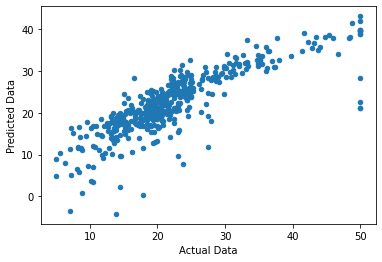

In [46]:
## Visualize relationship of Actual Data and Predicted Data in Training Set
plt.scatter(y_train,pred_train,s=20)
plt.xlabel('Actual Data')
plt.ylabel('Predicted Data')
plt.show()
## Ideal scatterplot result should be a straight line from bottom left towards top right of the graph
## Result: we see a few data that spread away from the middle of the line, those are most likely to be the error.

In [47]:
## Assign predicted answer for Real Test to variable
pred_test=Model.predict(X_test)

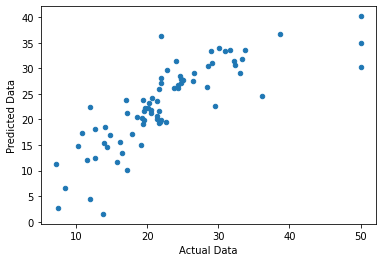

In [48]:
## Visualize relationship of Actual Data and Predicted Data in Testing Set
plt.scatter(y_test,pred_test,s=20)
plt.xlabel('Actual Data')
plt.ylabel('Predicted Data')
plt.show()
## Ideal scatterplot result should be a straight line from bottom left towards top right of the graph
## Result: Similar as testing set, we see a few data that spread away from the middle of the line, those are most likely to be the error.

In [49]:
## Combine question and answer key into one set
training_set=pd.concat([X_train,y_train],axis=1)
testing_set=pd.concat([X_test,y_test],axis=1)

In [50]:
## Add error column (how far predicted data going away from actual data)
training_set['price_pred']=pred_train
training_set['error']=abs(training_set['Price']-training_set['price_pred'])

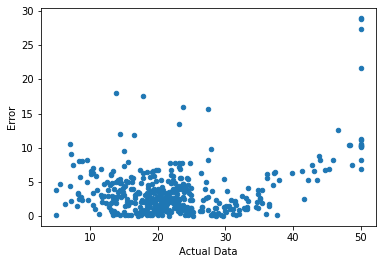

In [51]:
## Visualize relationship of Actual Data and Predicted Data
plt.scatter(training_set['Price'],training_set['error'],s=20)
plt.xlabel('Actual Data')
plt.ylabel('Error')
plt.show()
## Ideal scatterplot result for this analysis is the data caught in the bottom of the graph (y axis / error closer to 0)
## Result: there are a lot of erros detected, highest one is error closer to 30

<hr>

## Error Distribution
#### Good model have normally distributed error with mean value of 0

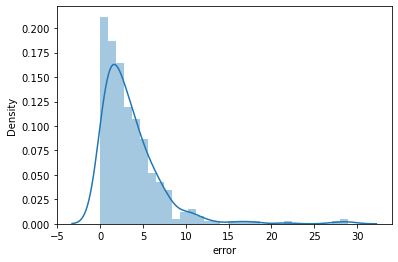

In [52]:
## Visualize distribution of error in Histogram
sns.distplot(training_set['error'])
plt.show()
## Result: Not Normally Distributed

In [53]:
## Calculate mean of errors
training_set['error'].mean()
## Result: Not 0 or close to 0s

3.5661069063499675

<hr>

## IMPROVEMENT MACHINE LEARNING (Project Limitation / Feature Engineering)

In [54]:
# PROJECT LIMITATION
training_set.sort_values('error',ascending=False).head(10)
## Take out 10 data with highest Error, then analyze those errors
### Insight: most of them have tax figures of 666, PTRATIO value of 20.2, with INDUS of 18.1

,CRIM,INDUS,NOX,RM,AGE,TAX,PTRATIO,LSTAT,Price,price_pred,error
368,4.89822,18.10,0.631,4.970,100.0,666.0,20.2,3.26,50.0,21.040730,28.959270
372,8.26725,18.10,0.668,5.875,89.6,666.0,20.2,8.88,50.0,21.181212,28.818788
371,9.23230,18.10,0.631,6.216,100.0,666.0,20.2,9.53,50.0,22.658691,27.341309
369,5.66998,18.10,0.631,6.683,96.8,666.0,20.2,3.73,50.0,28.318355,21.681645
374,18.49820,18.10,0.668,4.138,100.0,666.0,20.2,37.97,13.8,-4.207088,18.007088
412,18.81100,18.10,0.597,4.628,100.0,666.0,20.2,34.37,17.9,0.398310,17.501690
214,0.28955,10.59,0.489,5.412,9.8,277.0,18.6,29.55,23.7,7.671422,16.028578
365,4.55587,18.10,0.718,3.561,87.9,666.0,20.2,7.12,27.5,11.823270,15.676730
367,13.52220,18.10,0.631,3.863,100.0,666.0,20.2,13.33,23.1,9.626989,13.473011
228,0.29819,6.20,0.504,7.686,17.0,307.0,17.4,3.92,46.7,34.140319,12.559681


There is alternative to drop rows with such features with:
> df=df[df['TAX']!=666]

In [55]:
## EVALUATION MATRIX FOR REGRESSION
error_train=abs(y_train-pred_train)
error_test=abs(y_test-pred_test)

<hr>

## EVALUATION MATRIX FOR REGRESSION
1. R-Squared
    - determinant coefficient, to measure how good our Model is
    - to know % of Y (dependent var.) in X (independent var.)
    ```ex: % of mango flesh```
    - range: (minus)infinite - 1
        - negative value means prediction made by Model is **worse** than using mean
        - value closer to 1 means Model could make good prediction

2. MAE (Mean Absolute Error)
    - **absolute value** of mean of error
    - range: 0 - infinite
    - UoM is the same as the UoM of target data (currency, qty, or else)
    - closer to 0 the better
    - to know whether Error is acceptable or not -> compraed to **mean** of target data
    
3. MSE (Mean Squared Error)
    - **squared** of mean of error
    - range: 0 - infinite ```same as MAE```
    - give score to Error -> the higher the error, the higher/bigger the score
    - give penalty to high error
    - closer to 0 the better  ```same as MAE```

4. RMSE (Root Mean Squared Error)
    - **squared root** of MSE
    - standardized version of MSE
    - range: 0 - infinite ```same as MAE and MSE```
    - generally used Evauation Matrix for Regression, including for competition in Kaggle/Hackathon
    - give score to Error -> the higher the error, the higher/bigger the score ```same as MSE```
    - give penalty to high error ```same as MSE```
    - closer to 0 the better ```same as MSE```

> RMSE = MAE when all Errors are exactly the same

5. Optional when many outliers appear

### CASE EXAMPLE
1. Example 1
    - **Data = 100**, 
        - if MAE = 10 -> means prediction is ranged between 90 - 110

2. Example 2
    - Project A (Predict Total Bicycle Rent)
        > Mean 75 ; MAE 50
        - Prediction ranging 25 - 125, but by % (50/75) only 67%
    - Project B (Predict Supercar Price)
        > Mean 3,500,000,000 ; MAE 500,000,000
        - by % (500,000,000 / 3,500,000,000) -> 14.29%
    - Conclusion:
        - MAE for Project A is better than Project B (closer to zero)
        - However, Model for Project A might be not good enough because its only 67% (it all depends of the threshold set by management/client)

In [56]:
## import package
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

In [57]:
# ANSWER KEY FOR MOCK-UP TEST
y_train

298    22.5
68     17.4
496    19.7
153    19.4
33     13.1
       ... 
133    18.4
361    19.9
497    18.3
340    18.7
451    15.2
Name: Price, Length: 430, dtype: float64

In [58]:
## MODEL FOR MOCK-UP TEST
pred_train=Model.predict(X_train)

In [59]:
# EVALUATION MATRIX TRAINING SET
## BASE MODEL TRAINING SET
## Calculate Evaluation Matrix with Every Alternatives
r2_train=r2_score(y_train,pred_train)
MAE_train=mean_absolute_error(y_train,pred_train)
MSE_train=mean_squared_error(y_train,pred_train)
RMSE_train=np.sqrt(MSE_train)

## Present Result
print('Evaluation Matrix Result for Train Data:')
print('='*50)
print(f'R-Squared = {r2_train.round(2)}')
print(f'Mean Absolute Error = {MAE_train.round(2)}')
print(f'Mean Squared Error = {MSE_train.round(2)}')
print(f'Root Mean Squared Error = {RMSE_train.round(2)}')


Evaluation Matrix Result for Train Data:
R-Squared = 0.69
Mean Absolute Error = 3.57
Mean Squared Error = 26.25
Root Mean Squared Error = 5.12


<hr>

## EVALUATION FOR DATA TESTING (REAL-TEST)

In [60]:
## Answer Key for Real Test
y_test

337    18.5
30     12.7
364    21.9
240    22.0
162    50.0
       ... 
302    26.4
305    28.4
194    29.1
120    22.0
272    24.4
Name: Price, Length: 76, dtype: float64

In [61]:
## Model for Real Test
pred_test=Model.predict(X_test)

In [61]:
# EVALUATION MATRIX TESTING SET
## BASE MODEL TESTING SET
## Calculate Evaluation Matrix with Every Alternatives
r2_test=r2_score(y_test,pred_test)
MAE_test=mean_absolute_error(y_test,pred_test)
MSE_test=mean_squared_error(y_test,pred_test)
RMSE_test=np.sqrt(MSE_test)

## Present Result
print('Evaluation Matrix Result for Test Data:')
print('='*50)
print(f'R-Squared = {r2_test.round(2)}')
print(f'Mean Absolute Error = {MAE_test.round(2)}')
print(f'Mean Squared Error = {MSE_test.round(2)}')
print(f'Root Mean Squared Error = {RMSE_test.round(2)}')

KeyboardInterrupt: 

In [ ]:
# EVALUATION MATRIX TESTING SET
## BASE MODEL TESTING SET
## Calculate Evaluation Matrix with Every Alternatives
r2_test=r2_score(y_test,pred_test)
MAE_test=mean_absolute_error(y_test,pred_test)
MSE_test=mean_squared_error(y_test,pred_test)
RMSE_test=np.sqrt(MSE_test)

## Present Result
print('Evaluation Matrix Result for Test Data:')
print('='*50)
print(f'R-Squared = {r2_test.round(2)}')
print(f'Mean Absolute Error = {MAE_test.round(2)}')
print(f'Mean Squared Error = {MSE_test.round(2)}')
print(f'Root Mean Squared Error = {RMSE_test.round(2)}')

Evaluation Matrix Result for Test Data:
R-Squared = 0.64
Mean Absolute Error = 3.85
Mean Squared Error = 28.37
Root Mean Squared Error = 5.33


<hr>

## Training vs Testing

In [ ]:
data={
    'Training':[r2_train,MAE_train,MSE_train,RMSE_train],
    'Testing':[r2_test,MAE_test,MSE_test,RMSE_test],
    'Range':['-~ to 1','0 to ~','0 to ~','0 to ~'],
    'Indicator':['Closer to 1 the better','Closer to 0 the better','Closer to 0 the better','Closer to 0 the better']
}
pd.DataFrame(data,index=['R-Squared','MAE','MSE','RMSE']).round(2)

,Training,Testing,Range,Indicator
R-Squared,0.69,0.64,-~ to 1,Closer to 1 the better
MAE,3.57,3.85,0 to ~,Closer to 0 the better
MSE,26.25,28.37,0 to ~,Closer to 0 the better
RMSE,5.12,5.33,0 to ~,Closer to 0 the better


## Key Takeaways
This Model is *underfitting*, means that both of training and testing score of R-Squared falls below 70, good Model expected to score above 80 for both training and testing, while good training score but bad testing score indicates an overfitting Model.

<hr>

# POLYNOMIAL FEATURES

In [ ]:
## Import Package
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
X_train.head()

,CRIM,INDUS,NOX,RM,AGE,TAX,PTRATIO,LSTAT
298,0.06466,2.24,0.400,6.345,20.1,358.0,14.8,4.97
68,0.13554,6.07,0.409,5.594,36.8,345.0,18.9,13.09
496,0.28960,9.69,0.585,5.390,72.9,391.0,19.2,21.14
153,2.14918,19.58,0.871,5.709,98.5,403.0,14.7,15.79
33,1.15172,8.14,0.538,5.701,95.0,307.0,21.0,18.35


In [ ]:
## Let Model learn/see question for Mock Up Test to learn the pattern
Poli=PolynomialFeatures(degree=2,include_bias=False)
Poli=Poli.fit(X_train) 
# fit training data only, because Model may not see testing data
## data leakage = when Model accidentally see/learn/know condition of testing data

## Assign transformed training set into variables
x_train_poli=Poli.transform(X_train)
x_test_poli=Poli.transform(X_test)

In [ ]:
## Assign Question for Mock Up Test with Poly Model into Variable
df_x_train_poli=pd.DataFrame(x_train_poli)
df_x_train_poli.head()

,0,1,2,3,4,5,6,7,8,9,...,34,35,36,37,38,39,40,41,42,43
0,0.06466,2.24,0.400,6.345,20.1,358.0,14.8,4.97,0.004181,0.144838,...,404.01,7195.8,297.48,99.897,128164.0,5298.4,1779.26,219.04,73.556,24.7009
1,0.13554,6.07,0.409,5.594,36.8,345.0,18.9,13.09,0.018371,0.822728,...,1354.24,12696.0,695.52,481.712,119025.0,6520.5,4516.05,357.21,247.401,171.3481
2,0.28960,9.69,0.585,5.390,72.9,391.0,19.2,21.14,0.083868,2.806224,...,5314.41,28503.9,1399.68,1541.106,152881.0,7507.2,8265.74,368.64,405.888,446.8996
3,2.14918,19.58,0.871,5.709,98.5,403.0,14.7,15.79,4.618975,42.080944,...,9702.25,39695.5,1447.95,1555.315,162409.0,5924.1,6363.37,216.09,232.113,249.3241
4,1.15172,8.14,0.538,5.701,95.0,307.0,21.0,18.35,1.326459,9.375001,...,9025.00,29165.0,1995.00,1743.250,94249.0,6447.0,5633.45,441.00,385.350,336.7225


In [ ]:
## Assign Answer for Mock Up Test with Poly Model into Variable
df_x_test_poli=pd.DataFrame(x_test_poli)
df_x_test_poli.head()

,0,1,2,3,4,5,6,7,8,9,...,34,35,36,37,38,39,40,41,42,43
0,0.03041,5.19,0.515,5.895,59.6,224.0,20.2,10.56,0.000925,0.157828,...,3552.16,13350.4,1203.92,629.376,50176.0,4524.8,2365.44,408.04,213.312,111.5136
1,1.13081,8.14,0.538,5.713,94.1,307.0,21.0,22.60,1.278731,9.204793,...,8854.81,28888.7,1976.10,2126.660,94249.0,6447.0,6938.20,441.00,474.600,510.7600
2,3.47428,18.10,0.718,8.780,82.9,666.0,20.2,5.29,12.070622,62.884468,...,6872.41,55211.4,1674.58,438.541,443556.0,13453.2,3523.14,408.04,106.858,27.9841
3,0.11329,4.93,0.428,6.897,54.3,300.0,16.6,11.38,0.012835,0.558520,...,2948.49,16290.0,901.38,617.934,90000.0,4980.0,3414.00,275.56,188.908,129.5044
4,1.83377,19.58,0.605,7.802,98.2,403.0,14.7,1.92,3.362712,35.905217,...,9643.24,39574.6,1443.54,188.544,162409.0,5924.1,773.76,216.09,28.224,3.6864


In [ ]:
## Build Model
Model_Poli=LinearRegression()
Model_Poli.fit(x_train_poli,y_train)

LinearRegression()

In [ ]:
## Assign answer for Mock Up Test and Real Test to variable
Poli_train=Model_Poli.predict(x_train_poli)
Poli_test=Model_Poli.predict(x_test_poli)

In [ ]:
## POLYNOMIAL FEATURE TRAINING SET
## Calculate Evaluation Matrix with Every Alternatives
r2_Poly_Train=r2_score(y_train,Poli_train)
MAE_Poly_Train=mean_absolute_error(y_train,Poli_train)
MSE_Poly_Train=mean_squared_error(y_train,Poli_train)
RMSE_Poly_Train=np.sqrt(MSE_Poly_Train)

## POLYNOMIAL FEATURE TESTING SET
## Calculate Evaluation Matrix with Every Alternatives
r2_Poly_Test=r2_score(y_test,Poli_test)
MAE_Poly_Test=mean_absolute_error(y_test,Poli_test)
MSE_Poly_Test=mean_squared_error(y_test,Poli_test)
RMSE_Poly_Test=np.sqrt(MSE_Poly_Test)

## BASE vs POLYNOMIAL
ev_matrix={
    'LinRegTrain':[r2_train,MAE_train,MSE_train,RMSE_train],
    'LinRegTest':[r2_test,MAE_test,MSE_test,RMSE_test],
    'PolyTrain':[r2_Poly_Train,MAE_Poly_Train,MSE_Poly_Train,RMSE_Poly_Train],
    'PolyTest':[r2_Poly_Test,MAE_Poly_Test,MSE_Poly_Test,RMSE_Poly_Test],
    'Range':['-~ to 1','0 to ~','0 to ~','0 to ~'],
    'Indicator':['Closer to 1 the better','Closer to 0 the better','Closer to 0 the better','Closer to 0 the better']
}
pd.DataFrame(ev_matrix,index=['R-Squared','MAE','MSE','RMSE']).round(2)

,LinRegTrain,LinRegTest,PolyTrain,PolyTest,Range,Indicator
R-Squared,0.69,0.64,0.89,0.77,-~ to 1,Closer to 1 the better
MAE,3.57,3.85,2.18,2.92,0 to ~,Closer to 0 the better
MSE,26.25,28.37,9.43,18.16,0 to ~,Closer to 0 the better
RMSE,5.12,5.33,3.07,4.26,0 to ~,Closer to 0 the better


## Analysis
- Good Model expected to score above 80 for both training and testing, while good training score but bad testing score indicates an overfitting Model.
- After using Polynomial Featues, R-Squared for both training and testing sets score above 75.
- Even though R-Squared for testing set after polynomial features still below 80, the R-Squared scores have improved compared to basic Multiple Linear Regression model.
- Scores for all evaluation matrix methods show massive improvement as MAE, MSE, RMSE all scored closer to 0 (ideal result). 

<hr>

# `REGULARIZATION + Polynomial Features`

In [ ]:
## Import Package
from sklearn.linear_model import Ridge, Lasso, ElasticNet

### Before Tuning

In [ ]:
## Build Model
Model_R=Ridge()
Model_L=Lasso()
Model_E=ElasticNet()

In [ ]:
## Predict with every Model
Model_R.fit(df_x_train_poli,y_train)
R_train=Model_R.predict(df_x_train_poli)
R_test=Model_R.predict(df_x_test_poli)

Model_L.fit(df_x_train_poli,y_train)
L_train=Model_L.predict(df_x_train_poli)
L_test=Model_L.predict(df_x_test_poli)

Model_E.fit(df_x_train_poli,y_train)
E_train=Model_E.predict(df_x_train_poli)
E_test=Model_E.predict(df_x_test_poli)

In [ ]:
## RIDGE TRAINING SET
## Calculate Evaluation Matrix with Every Alternatives
r2_Ridge_Train=r2_score(y_train,R_train)
MAE_Ridge_Train=mean_absolute_error(y_train,R_train)
MSE_Ridge_Train=mean_squared_error(y_train,R_train)
RMSE_Ridge_Train=np.sqrt(MSE_Ridge_Train)

## RIDGE TESTING SET
## Calculate Evaluation Matrix with Every Alternatives
r2_Ridge_Test=r2_score(y_test,R_test)
MAE_Ridge_Test=mean_absolute_error(y_test,R_test)
MSE_Ridge_Test=mean_squared_error(y_test,R_test)
RMSE_Ridge_Test=np.sqrt(MSE_Ridge_Test)

## LASSO TRAINING SET
## Calculate Evaluation Matrix with Every Alternatives
r2_Lasso_Train=r2_score(y_train,L_train)
MAE_Lasso_Train=mean_absolute_error(y_train,L_train)
MSE_Lasso_Train=mean_squared_error(y_train,L_train)
RMSE_Lasso_Train=np.sqrt(MSE_Lasso_Train)

## LASSO TESTING SET
## Calculate Evaluation Matrix with Every Alternatives
r2_Lasso_Test=r2_score(y_test,L_test)
MAE_Lasso_Test=mean_absolute_error(y_test,L_test)
MSE_Lasso_Test=mean_squared_error(y_test,L_test)
RMSE_Lasso_Test=np.sqrt(MSE_Lasso_Test)

## ELASTICNET TRAINING SET
## Calculate Evaluation Matrix with Every Alternatives
r2_Elasticnet_Train=r2_score(y_train,E_train)
MAE_Elasticnet_Train=mean_absolute_error(y_train,E_train)
MSE_Elasticnet_Train=mean_squared_error(y_train,E_train)
RMSE_Elasticnet_Train=np.sqrt(MSE_Elasticnet_Train)

## RIDGE TESTING SET
## Calculate Evaluation Matrix with Every Alternatives
r2_Elasticnet_Test=r2_score(y_test,E_test)
MAE_Elasticnet_Test=mean_absolute_error(y_test,E_test)
MSE_Elasticnet_Test=mean_squared_error(y_test,E_test)
RMSE_Elasticnet_Test=np.sqrt(MSE_Elasticnet_Test)

## BEFORE vs AFTER REGULARIZATION
ev_matrix_reg={
    'LinRegTrain':[r2_train,MAE_train,MSE_train,RMSE_train],
    'LinRegTest':[r2_test,MAE_test,MSE_test,RMSE_test],
    'PolyTrain':[r2_Poly_Train,MAE_Poly_Train,MSE_Poly_Train,RMSE_Poly_Train],
    'PolyTest':[r2_Poly_Test,MAE_Poly_Test,MSE_Poly_Test,RMSE_Poly_Test],
    'RidgeTrain':[r2_Ridge_Train,MAE_Ridge_Train,MSE_Ridge_Train,RMSE_Ridge_Train],
    'RidgeTest':[r2_Ridge_Test,MAE_Ridge_Test,MSE_Ridge_Test,RMSE_Ridge_Test],
    'LassoTrain':[r2_Lasso_Train,MAE_Lasso_Train,MSE_Lasso_Train,RMSE_Lasso_Train],
    'LassoTest':[r2_Lasso_Test,MAE_Lasso_Test,MSE_Lasso_Test,RMSE_Lasso_Test],
    'ElasticnetTrain':[r2_Elasticnet_Train,MAE_Elasticnet_Train,MSE_Elasticnet_Train,RMSE_Elasticnet_Train],
    'ElasticnetTest':[r2_Elasticnet_Test,MAE_Elasticnet_Test,MSE_Elasticnet_Test,RMSE_Elasticnet_Test],    
    'Range':['-~ to 1','0 to ~','0 to ~','0 to ~'],
    'Indicator':['Closer to 1 the better','Closer to 0 the better','Closer to 0 the better','Closer to 0 the better']
}
summary=pd.DataFrame(ev_matrix_reg,index=['R-Squared','MAE','MSE','RMSE']).round(2)
summary.T

,LinRegTrain,LinRegTest,PolyTrain,PolyTest,RidgeTrain,RidgeTest,LassoTrain,LassoTest,ElasticnetTrain,ElasticnetTest,Range,Indicator
R-Squared,0.69,0.64,0.89,0.77,0.89,0.74,0.87,0.73,0.87,0.73,-~ to 1,Closer to 1 the better
MAE,3.57,3.85,2.18,2.92,2.18,2.98,2.42,3.15,2.41,3.15,0 to ~,Closer to 0 the better
MSE,26.25,28.37,9.43,18.16,9.65,20.53,11.43,20.97,11.37,21.26,0 to ~,Closer to 0 the better
RMSE,5.12,5.33,3.07,4.26,3.11,4.53,3.38,4.58,3.37,4.61,0 to ~,Closer to 0 the better


#### Summary:
- Based on the indicator of R-Squared, Evaluation Matrix score for training test using polynomial features and ridge+polynomial features are the highest among all models. Score for testing set using both models produce an acceptable result even though did not exceed requirements which ideally would score above 0.80

### Manual Tuning

In [ ]:
## Provide Alpha List to be Tested
parameter_a=[0.001,0.01,1,10,20,30,40,50,100]
parameter_b=np.arange(0,3,0.001)

In [ ]:
## Use only R-Squared to Compare
train_rsq_R=[]
test_rsq_R=[]
train_rsq_L=[]
test_rsq_L=[]
train_rsq_E=[]
test_rsq_E=[]

for i in parameter_b:
    ## Ridge Training
    model_R=Ridge(alpha=i)
    model_R.fit(df_x_train_poli,y_train)
    y_predR_train=model_R.predict(df_x_train_poli)
    R2_ridge_train=r2_score(y_train,y_predR_train)
    train_rsq_R.append(R2_ridge_train)

    ## Ridge Testing
    y_predR_test=model_R.predict(df_x_test_poli)
    R2_ridge_test=r2_score(y_test,y_predR_test)
    test_rsq_R.append(R2_ridge_test)

    ## Lasso Training
    model_L=Lasso(alpha=i)
    model_L.fit(df_x_train_poli,y_train)
    y_predL_train=model_L.predict(df_x_train_poli)
    R2_lasso_train=r2_score(y_train,y_predL_train)
    train_rsq_L.append(R2_lasso_train)

    ## Lasso Testing
    y_predL_test=model_L.predict(df_x_test_poli)
    R2_lasso_test=r2_score(y_test,y_predL_test)
    test_rsq_L.append(R2_lasso_test)

    ## ElasticNet Training
    model_E=ElasticNet(alpha=i,l1_ratio=0.6)
    model_E.fit(df_x_train_poli,y_train)
    y_predE_train=model_E.predict(df_x_train_poli)
    R2_elasticnet_train=r2_score(y_train,y_predE_train)
    train_rsq_E.append(R2_elasticnet_train)

    ## ElasticNet Testing
    y_predE_test=model_E.predict(df_x_test_poli)
    R2_elasticnet_test=r2_score(y_test,y_predE_test)
    test_rsq_E.append(R2_elasticnet_test)

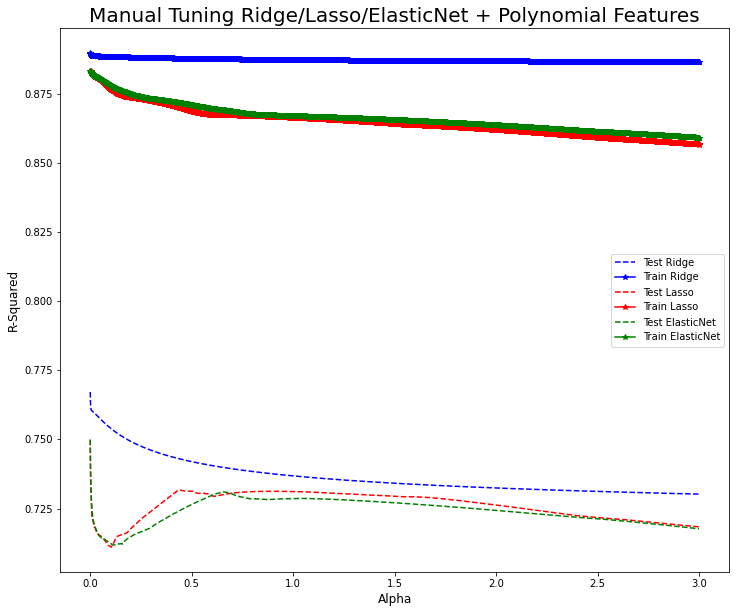

: 

In [ ]:
## Visualization
plt.figure(figsize=(12,10))
plt.plot(parameter_b,test_rsq_R,'b--',linewidth=1.5)
plt.plot(parameter_b,train_rsq_R,'b*-',linewidth=1.5)
plt.plot(parameter_b,test_rsq_L,'r--',linewidth=1.5)
plt.plot(parameter_b,train_rsq_L,'r*-',linewidth=1.5)
plt.plot(parameter_b,test_rsq_E,'g--',linewidth=1.5)
plt.plot(parameter_b,train_rsq_E,'g*-',linewidth=1.5)
plt.legend(['Test Ridge','Train Ridge','Test Lasso','Train Lasso','Test ElasticNet','Train ElasticNet'])
plt.title('Manual Tuning Ridge/Lasso/ElasticNet + Polynomial Features',size=20)
plt.ylabel('R-Squared',size=12)
plt.xlabel('Alpha',size=12)
plt.show()

In [ ]:
## search Alpha for highest R-Squared result per category
print(f'Ridge Train = {parameter_b[np.argmax(train_rsq_R)]}')
print(f'Ridge Test = {parameter_b[np.argmax(test_rsq_R)]}')
print(f'Lasso Train = {parameter_b[np.argmax(train_rsq_L)]}')
print(f'Lasso Test = {parameter_b[np.argmax(test_rsq_L)]}')
print(f'ElasticNet Train = {parameter_b[np.argmax(train_rsq_E)]}')
print(f'ElasticNet Test = {parameter_b[np.argmax(test_rsq_E)]}')

Ridge Train = 0.0
Ridge Test = 0.0
Lasso Train = 0.001
Lasso Test = 0.0
ElasticNet Train = 0.0
ElasticNet Test = 0.0


### Insight:
- Best evaluation matrix result (R-Squared score) is from Ridge Models with training set score above 0.875 and testing score a bit below 0.775.
- The best Alpha value for this Ridge Model is 0.0